In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = '/data/users4/xli/interpolation/results'
res_path = '/data/users4/xli/interpolation/visualization'
sz_res_path = os.path.join(data_path, 'sfnc_sz/vae/hypopt/layer3/seed3')
asd_res_path = os.path.join(data_path, 'sfnc_asd/vae/hypopt/layer2/seed6')

corr_sz_train = np.load(os.path.join(sz_res_path, 'corr.npy'))
corr_sz_test = np.load(os.path.join(sz_res_path, 'corr_test.npy'))
corr_asd_train = np.load(os.path.join(asd_res_path, 'corr.npy'))
corr_asd_test = np.load(os.path.join(asd_res_path, 'corr_test.npy'))
corr_list = [[corr_sz_train, corr_sz_test], [corr_asd_train, corr_asd_test]]

y_sz_train = np.load(os.path.join(sz_res_path, 'y_train_2d.npy'))
y_sz_test = np.load(os.path.join(sz_res_path, 'y_test_2d.npy'))
y_asd_train = np.load(os.path.join(asd_res_path, 'y_train_2d.npy'))
y_asd_test = np.load(os.path.join(asd_res_path, 'y_test_2d.npy'))
y_list = [[y_sz_train, y_sz_test], [y_asd_train, y_asd_test]]

In [3]:
print(np.sum(corr_sz_train>0.6), np.sum(corr_sz_train>0.8), np.sum(corr_sz_train>0.6)/225, np.sum(corr_sz_train>0.8)/225)
print(np.sum(corr_asd_train>0.6), np.sum(corr_asd_train>0.8), np.sum(corr_asd_train>0.6)/225, np.sum(corr_asd_train>0.8)/225)

for i, ii in enumerate(['sz', 'asd']):
    for j, jj in enumerate(['train', 'test']):
        print(ii, jj, 'patient', np.median(corr_list[i][j][y_list[i][j]==1]))
        print(ii, jj, 'control', np.median(corr_list[i][j][y_list[i][j]==2]))

225 106 1.0 0.4711111111111111
224 54 0.9955555555555555 0.24
sz train patient 0.7683864037187536
sz train control 0.8189563368841977
sz test patient 0.746605980400606
sz test control 0.7924817665123841
asd train patient 0.7619676032270561
asd train control 0.7840143550152245
asd test patient 0.7108753122345993
asd test control 0.7397950801293107


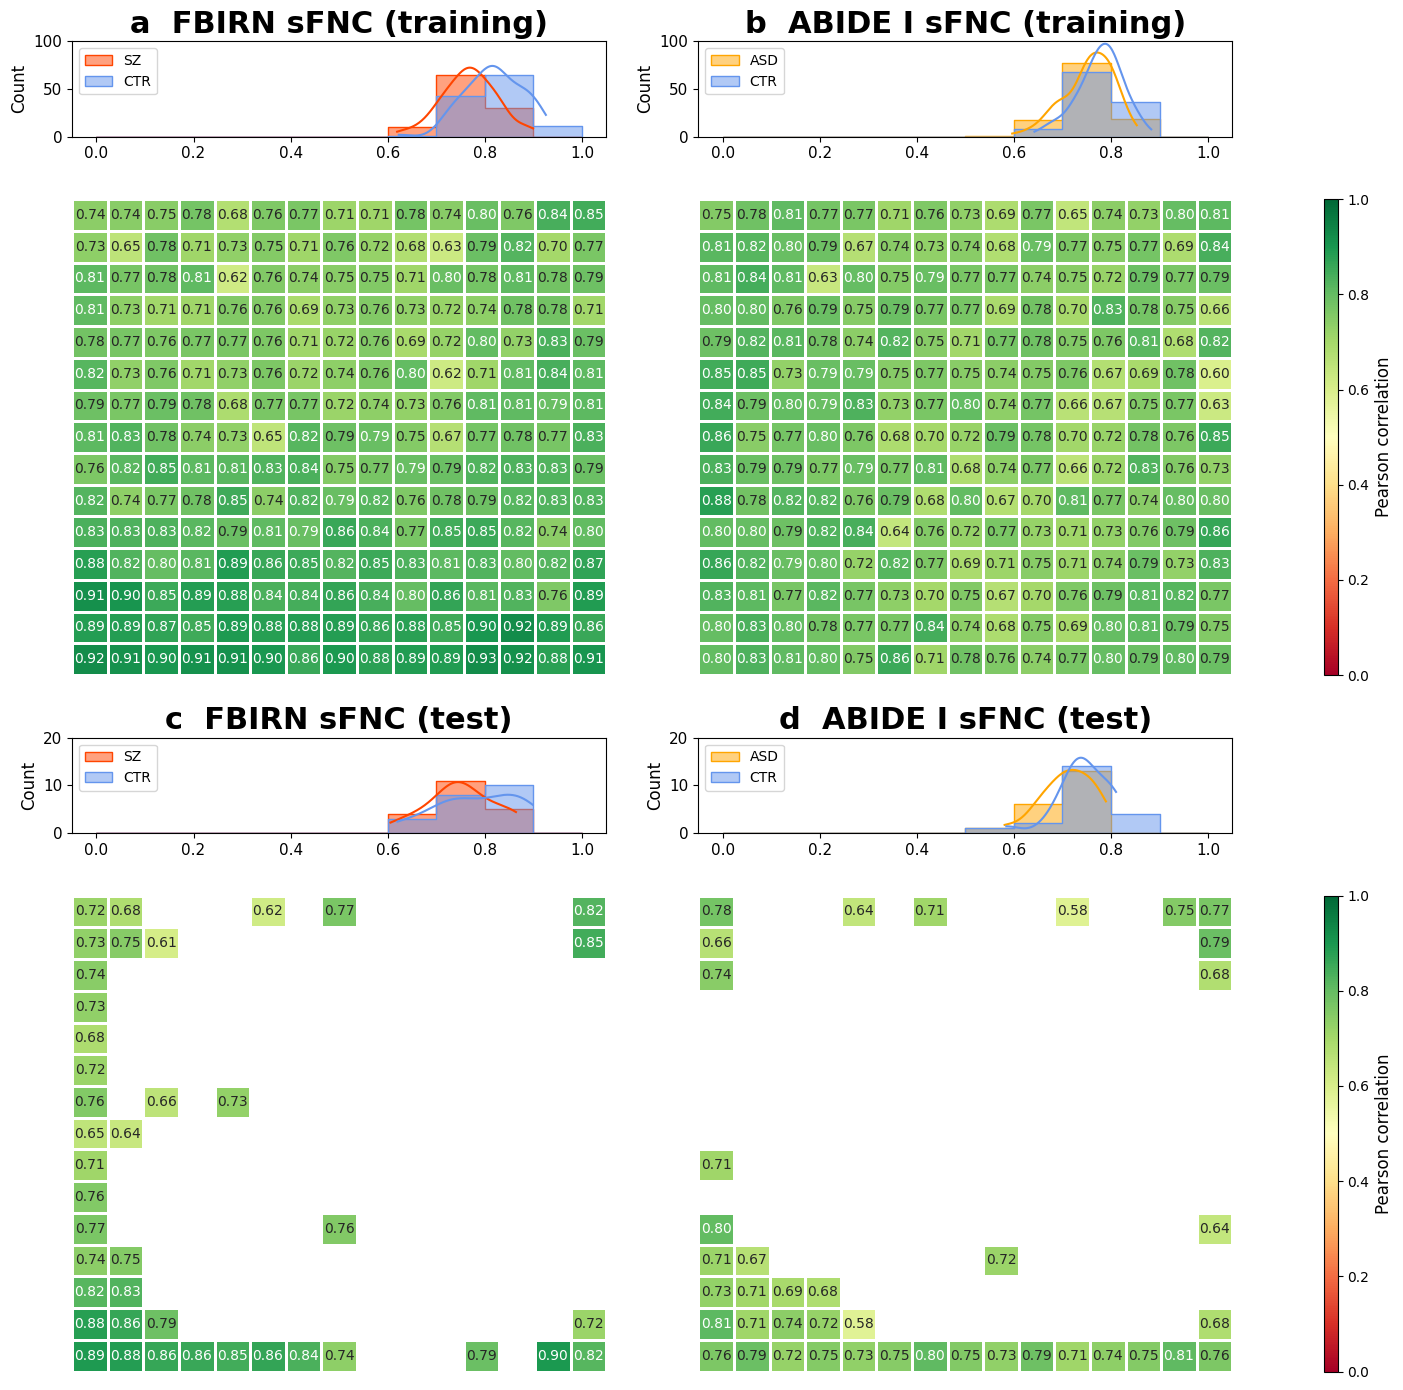

In [4]:
title_list = [['a  FBIRN sFNC (training)', 'c  FBIRN sFNC (test)'], ['b  ABIDE I sFNC (training)', 'd  ABIDE I sFNC (test)']]
patient_list = ['SZ', 'ASD']
patient_color_list = ['orangered', 'orange']

count_lim = [100, 20]

fig, axes = plt.subplots(nrows=4, ncols=2+1, figsize=(14,14), gridspec_kw={"width_ratios":[1,1,0.025],'height_ratios': [1,5,1,5]})

for i in range(2):
    for j, k in enumerate([1,3]):
        sns.heatmap(np.abs(corr_list[i][j]), linewidths=1, annot=True, fmt='.2f', cbar=False, cmap="RdYlGn", vmin=0, vmax=1, ax=axes[k,i])
        axes[k,i].axis('off')
        sns.histplot(np.abs(corr_list[i][j][y_list[i][j]==1]).flatten(), kde=True, binwidth=0.1, binrange=[0,1], color=patient_color_list[i], element="step", label=patient_list[i], ax=axes[j*2,i])
        sns.histplot(np.abs(corr_list[i][j][y_list[i][j]==2]).flatten(), kde=True, binwidth=0.1, binrange=[0,1], color="cornflowerblue", element="step", label="CTR", ax=axes[j*2,i])
        axes[j*2,i].set_title(title_list[i][j], color="k", fontweight="bold", fontsize=22)
        axes[j*2,i].tick_params(axis='both', which='major', labelsize=11)
        axes[j*2,i].set_ylabel('Count', fontsize=12)
        axes[j*2,i].set_ylim([0,count_lim[j]])
        axes[j*2,i].legend(loc='upper left')

for i in [1, 3]:
    cbar = fig.colorbar(axes[1,0].get_children()[0], cax=axes[i,2], orientation="vertical")
    cbar.set_label('Pearson correlation', fontsize=12)

for i in [0, 2]:
    axes[i,2].axis('off')

plt.subplots_adjust(wspace=10, hspace=10)
plt.tight_layout()
plt.savefig(os.path.join(res_path, 'corr.pdf'))